In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cv2

In [2]:
training_dataset_path = "../GroupProject/training_set"
test_dataset_path = "../GroupProject/validation_set"

categories = ['drawings', 'engraving', 'iconography', 'painting', 'sculpture']

# 5 possible categories
n_categories = 5
category_embeddings = {
    'drawings': 0,
    'engraving': 1,
    'iconography': 2,
    'painting': 3,
    'sculpture': 4
}

In [3]:
# NOTE: This code only pulls 100 images from each training category, run the block below for all images
totalTrainImages = 500
totalTestImages = 100   # 20 test images for now

# Initialize the the arrays
# For Y, drawings=0, engraving=1, iconography=2, painting=3, sculpture=4
height = width = 64
channels = 3
X_train = np.zeros((totalTrainImages, height, width, channels), dtype=np.uint8)
X_test = np.zeros((totalTestImages, height, width, channels), dtype=np.uint8)
Y_train = np.zeros((totalTrainImages, n_categories), dtype=np.uint8)
Y_test= np.zeros((totalTestImages, n_categories), dtype=np.uint8)

tr = 0    # temp vars to fill the training dataset arrays
te = 0

# Begin fetching and processing images
for cat in categories:
    #trainFiles and testFiles are arrays containing every file in the current folder(based on cat)
    trainFiles = os.listdir(training_dataset_path+ '/' + cat)   
    testFiles = os.listdir(test_dataset_path+ '/' + cat)     
    
    print("CURRENT CATEGORY: " + cat)
    
    # Go through 100 image files in current training folder, open, resize, and store into np array
    for file in trainFiles[:100]: 
        trainFilePath = training_dataset_path+ '/'+ cat + '/' + file
        try:
            img = cv2.imread(trainFilePath)
            img = cv2.resize(img, (width,height), interpolation=cv2.INTER_AREA)

            # Add the resized numpy image to X
            X_train[tr] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)     #Changing color scheme so matplotlib looks right
            Y_train[tr,category_embeddings.get(cat)] = 1           #Array location representing the category
                                
            tr += 1
            if tr%100==0 and tr>0:
                print("Processed:", tr, " training images")
        except:
            print("Deleting: ", trainFilePath)
            os.remove(trainFilePath)
        
    # Same thing as above but for current test folder
    for file in testFiles[:20]:
        testFilePath = test_dataset_path+ '/'+ cat + '/' + file
        try:
            img = cv2.imread(testFilePath)
            img = cv2.resize(img, (width,height), interpolation=cv2.INTER_AREA)
            
            # Add the resized numpy image to X
            X_test[te] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            Y_test[te, category_embeddings.get(cat)] = 1           #Numbers representing the category
            
            te += 1
            if te%20==0 and te>0:
                print("Processed:", te, "test images")
        except:
            print("Deleting: ", testFilePath)
            os.remove(testFilePath)
        
print("X_train shape:",X_train.shape)
print("Y_train shape:",Y_train.shape)
print("X_test shape:",X_test.shape)
print("Y_test shape:",Y_test.shape)

CURRENT CATEGORY: drawings
Processed: 100  training images
Processed: 20 test images
CURRENT CATEGORY: engraving
Processed: 200  training images
Processed: 40 test images
CURRENT CATEGORY: iconography
Processed: 300  training images
Processed: 60 test images
CURRENT CATEGORY: painting
Processed: 400  training images
Processed: 80 test images
CURRENT CATEGORY: sculpture
Processed: 500  training images
Processed: 100 test images
X_train shape: (500, 64, 64, 3)
Y_train shape: (500, 5)
X_test shape: (100, 64, 64, 3)
Y_test shape: (100, 5)


In [4]:
# Save np array into my directory
myDir = "C:/Users/Alex/Desktop/CS596/GroupProject"
np.save(myDir+"/X_train", X_train)
np.save(myDir+"/Y_train", Y_train)
np.save(myDir+"/X_test", X_test)
np.save(myDir+"/Y_test", Y_test)

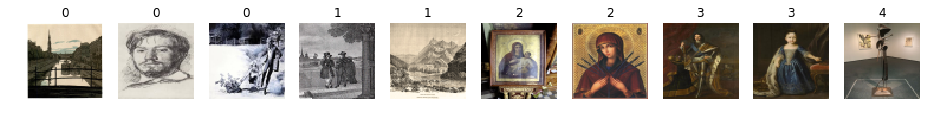

In [7]:
# Visualize some data
fig = plt.figure(figsize=(16, 8))
for i in range(10):
    img = X_train[49*i,:].reshape((64,64,3))
    fig.add_subplot(1, 10, i+1)
    plt.imshow(img)
    plt.axis('off')
    y_label = np.argmax(Y_train[49*i,:], axis=0)
    plt.title(y_label)
    
plt.show()

In [ ]:
# THIS CODE BLOCK RUNS THROUGH EVERY IMAGE, DO NOT RUN
# Pull images from directory and store in respective np arrays (X_train, X_test, Y_train, Y_test)
# NOTE: Some images are corrupted/can't even open normally, so program deletes them
# (A lot of files in paintings were corrupted)

# Get the total number of files: should be 7719 for trainng images and 856 for test images
#(Need to run this code block twice to delete the bad images)
totalTrainImages=0
totalTestImages=0
for cat in categories:
    trainFiles = os.listdir(training_dataset_path+ '/' + cat)
    totalTrainImages += len(trainFiles)
    testFiles = os.listdir(test_datasetb_path+ '/' + cat)
    totalTestImages += len(testFiles)
    
# Initialize the the arrays
# For Y, drawings=0, engraving=1, iconography=2, painting=3, sculpture=4
height = width = 64
channels = 3
X_train = np.zeros((totalTrainImages, height, width, channels), dtype=np.uint8)
X_test = np.zeros((totalTestImages, height, width, channels), dtype=np.uint8)
Y_train = np.zeros((totalTrainImages, n_categories), dtype=np.uint8)
Y_test= np.zeros((totalTestImages, n_categories), dtype=np.uint8)

tr = 0    # temp vars to fill the training dataset arrays
te = 0

# Begin fetching and processing images
for cat in categories:
    #trainFiles and testFiles are arrays containing every file in the current folder(based on cat)
    trainFiles = os.listdir(training_dataset_path+ '/' + cat)   
    testFiles = os.listdir(test_dataset_path+ '/' + cat)     
    
    print("CURRENT CATEGORY: " + cat)
    
    # Go through each image file in current training folder, open, resize, and store into np array
    for file in trainFiles: 
        trainFilePath = training_dataset_path+ '/'+ cat + '/' + file
        try:
            img = cv2.imread(trainFilePath)
            img = cv2.resize(img, (width,height), interpolation=cv2.INTER_AREA)
            # Add the resized numpy image to X
            X_train[tr] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)     #Changing color scheme so matplotlib looks right
            Y_train[tr] = category_embeddings.get(cat)             #Numbers representing the category
        
            if tr%100==0 and tr>0:
                print("Processed:",tr,"training images")
            tr += 1
        except:
            print("Deleting: ", trainFilePath)
            os.remove(trainFilePath)
        
    # Same thing as above but for current test folder
    for file in testFiles:
        testFilePath = test_dataset_path+ '/'+ cat + '/' + file
        try:
            img = cv2.imread(testFilePath)
            img = cv2.resize(img, (width,height), interpolation=cv2.INTER_AREA)
            
            # Add the resized numpy image to X
            X_test[te] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            Y_test[te] = category_embeddings.get(cat)             #Numbers representing the category
            
            if te%100==0 and te>0:
                print("Processed:",te,"test images")
            te += 1
        except:
            print("Deleting: ", testFilePath)
            os.remove(testFilePath)
        
print("X_train shape:",X_train.shape)
print("Y_train shape:",Y_train.shape)
print("X_test shape:",X_test.shape)
print("Y_test shape:",Y_test.shape)